## Skin Cancer Detection 
By Effy Fang, Ying Huang, Kai Li

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import seaborn as sns
from PIL import Image

In [3]:
folder_benign_train = 'Data/train/benign'
folder_malignant_train = 'Data/train/malignant'

folder_benign_test = 'Data/test/benign'
folder_malignant_test = 'Data/test/malignant'

In [5]:
#load train file
read = lambda imname: np.asarray(Image.open(imname).convert("RGB"))
ims_benign = [read(os.path.join(folder_benign_train, filename)) for filename in os.listdir(folder_benign_train)]
X_benign = np.array(ims_benign, dtype='uint8')
ims_malignant = [read(os.path.join(folder_malignant_train, filename)) for filename in os.listdir(folder_malignant_train)]
X_malignant = np.array(ims_malignant, dtype='uint8')

# Load in testing pictures
ims_benign = [read(os.path.join(folder_benign_test, filename)) for filename in os.listdir(folder_benign_test)]
X_benign_test = np.array(ims_benign, dtype='uint8')
ims_malignant = [read(os.path.join(folder_malignant_test, filename)) for filename in os.listdir(folder_malignant_test)]
X_malignant_test = np.array(ims_malignant, dtype='uint8')

In [6]:
#create labels for train
y_benign = np.zeros(X_benign.shape[0])
y_malignant = np.ones(X_malignant.shape[0])
#for test
y_benign_test = np.zeros(X_benign_test.shape[0])
y_malignant_test = np.ones(X_malignant_test.shape[0])

In [7]:
#Merge data
X_train = np.concatenate((X_benign, X_malignant), axis = 0)
y_train = np.concatenate((y_benign, y_malignant), axis = 0)

X_holdout = np.concatenate((X_benign_test, X_malignant_test), axis = 0)
y_holdout = np.concatenate((y_benign_test, y_malignant_test), axis = 0)

#shuffle
np.random.seed(0)
s = np.arange(X_train.shape[0])
np.random.shuffle(s)
X_train = X_train[s]
y_train = y_train[s]

np.random.seed(0)
s = np.arange(X_holdout.shape[0])
np.random.shuffle(s)
X_holdout = X_holdout[s]
y_holdout = y_holdout[s]

In [8]:
#X_train.shape
X_holdout.shape

(660, 224, 224, 3)

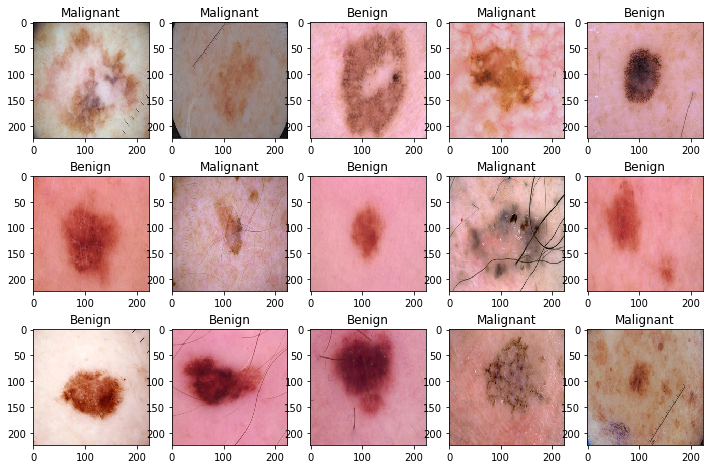

In [9]:
# Display first 15 images of moles, and how they are classified
w=40
h=30
fig=plt.figure(figsize=(12, 8))
columns = 5
rows = 3

for i in range(1, columns*rows +1):
    ax = fig.add_subplot(rows, columns, i)
    if y_train[i] == 0:
        ax.title.set_text('Benign')
    else:
        ax.title.set_text('Malignant')
    plt.imshow(X_train[i], interpolation='nearest')
plt.show()

In [10]:
X_train[0].shape

(224, 224, 3)

In [11]:
#normalize
X_train = X_train/255
X_holdout = X_holdout/255

In [12]:
X_train_reshaped = X_train.reshape((X_train.shape[0],-1))

In [13]:
X_train_reshaped.shape

(2637, 150528)

In [14]:
#PCA
from sklearn.decomposition import PCA

pca = PCA(copy=True).fit(X_train_reshaped)

KeyboardInterrupt: 

In [14]:
def plot_scaled_variance(pca):
    '''
    Plots the variance explained by each of the principal components.
    Features are scaled with sklearn.StandardScaler.
    
    Parameters
    ----------
    pca: An sklearn.decomposition.pca.PCA instance.
    
    Returns
    -------
    A matplotlib.Axes instance.
    '''
    
    # YOUR CODE HERE
    plt.plot(pca.explained_variance_ratio_)
    plt.xlabel('Dimension #')
    plt.ylabel('Explained Variance Ratio')
    plt.title('Fraction of Explained Variance')
    ax = plt.gca()
    
    
    
    return ax

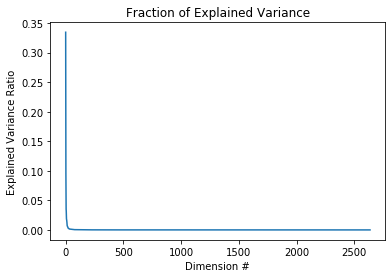

In [28]:
ax = plot_scaled_variance(pca)

In [15]:
print(np.where(np.cumsum(pca.explained_variance_ratio_)>0.9)[0][0]) #42 features explains more than 90% variance 
print(np.where(np.cumsum(pca.explained_variance_ratio_)>0.95)[0][0])

41
166


In [16]:
pca42 = PCA(copy=True, n_components=42)
pca42.fit(X_train_reshaped)
X_train_reduced=pca42.transform(X_train_reshaped)

X_holdout_reshaped = X_holdout.reshape((X_holdout.shape[0],-1))
X_holdout_reduced=pca42.transform(X_holdout_reshaped)

In [17]:
pca167 = PCA(copy=True, n_components=167)
pca167.fit(X_train_reshaped)

X_train_reduced167=pca167.transform(X_train_reshaped)
X_holdout_reduced167=pca167.transform(X_holdout_reshaped)

In [19]:
# saving the pca reduced data 
np.save('X_train_reduced.npy', X_train_reduced)
np.save('X_holdout_reduced.npy', X_holdout_reduced)

np.save('X_train_reduced167.npy', X_train_reduced167)
np.save('X_holdout_reduced167.npy', X_holdout_reduced167)

In [17]:
# to read the file 
X_train_reduced = np.load('X_train_reduced.npy')
#X_holdout_reduced = np.load('X_holdout_reduced.npy')
#X_train_reduced167 = np.load('X_train_reduced167.npy')
#X_holdout_reduced167 = np.load('X_holdout_reduced167.npy')

In [18]:
X_train_reduced.shape

(2637, 42)

In [19]:
from sklearn import svm
# import the class
from sklearn.linear_model import LogisticRegression

# split the data
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import AdaBoostClassifier

from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [21]:
y_train_label=y_train
X_train,X_test,y_train,y_test=train_test_split(X_train_reduced,y_train_label,test_size=0.2,random_state=0)


# instantiate the model (using the default parameters)
log_model = LogisticRegression()
C = 1.0  # SVM regularization parameter

# LinearSVC (linear kernel)
lin_svc = svm.LinearSVC(C=C)
#SVC with RBF kernel
rbf_svc = svm.SVC(kernel='rbf', C=C)
# SVC with polynomial (degree 3) kernel
poly_svc = svm.SVC(kernel='poly', C=C)
# decision tree
dt = DecisionTreeClassifier(random_state=0)
# random forest 
rf = RandomForestClassifier(random_state=0)

# Import AdaBoostClassifier
ada = AdaBoostClassifier(base_estimator=dt, random_state=0)

models = [log_model, lin_svc, rbf_svc, poly_svc, rf, ada]

names = ['Logistic Regression', 'SVC(linear kernal)','SVC(RBF)','SVC(polynomial)','Random Forest','Ada Boosting']

reports=[]
f1_score=[]
precision=[]
recall=[]
acc=[]

for model in models: 
    # fit the model
    model.fit(X_train,y_train)
    # predict on the test set 
    y_pred=model.predict(X_test)
    # save the scores for comparison 
    report=metrics.classification_report(y_test, y_pred,output_dict=True)
    reports.append(report)
    f1_score.append(report['weighted avg']['f1-score'])
    precision.append(report['weighted avg']['precision'])
    recall.append(report['weighted avg']['recall'])
    acc.append(metrics.accuracy_score(y_test,y_pred))
    
models_df=pd.DataFrame({'models':names, 'accuracy':acc,'f1_score':f1_score,'precision':precision, 'recall':recall})
models_df.round(3).sort_values(by='accuracy', ascending=False)

/Users/apple/anaconda3/envs/tensorflow/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/apple/anaconda3/envs/tensorflow/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/apple/anaconda3/envs/tensorflow/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/apple/anaconda3/envs/tensorflow/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unsc

,models,accuracy,f1_score,precision,recall
0,Logistic Regression,0.784,0.784,0.784,0.784
4,Random Forest,0.778,0.777,0.779,0.778
1,SVC(linear kernal),0.744,0.745,0.746,0.744
3,SVC(polynomial),0.739,0.739,0.739,0.739
5,Ada Boosting,0.737,0.736,0.736,0.737
2,SVC(RBF),0.564,0.419,0.756,0.564


In [30]:
cv_models=[log_model, rf, poly_svc]
cv_names= ['Logistic Regression', 'Random Forest','SVC(polynomial)']
acc_mean=[]
acc_high=[]
acc_low=[]

for model in cv_models:
    scores = cross_val_score(model, X_train_reduced, y_train_label, scoring='accuracy', cv=5)
    #scores = cross_val_score(model, X_train, y_train, scoring='accuracy',cv=5)
    acc_mean.append(scores.mean())
    acc_high.append(scores.max())
    acc_low.append(scores.min())

cv_df=pd.DataFrame({'models':cv_names, 'acc_mean':acc_mean,'acc_high':acc_high,'acc_low':acc_low})
cv_df.round(3).sort_values(by='acc_mean', ascending=False)

C:\Users\effyf\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\effyf\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\effyf\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\effyf\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\effyf\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linea

,models,acc_mean,acc_high,acc_low
0,Logistic Regression,0.781,0.827,0.755
1,Random Forest,0.779,0.806,0.752
2,SVC(polynomial),0.759,0.786,0.729


In [32]:
#Parameter Tuning 
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators':[10,50,100,500],
              'max_features':[10,20,'auto','log2'],
              'max_depth':[10,50,100,None],
              'criterion':['gini', 'entropy']}
rf_grid = GridSearchCV(rf, param_grid, cv = 5, scoring = 'accuracy',refit = True, n_jobs=-1, verbose = 5)
rf_grid.fit(X_train, y_train)



Fitting 5 folds for each of 128 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   49.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed: 15.5min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'criteri

In [37]:
param_grid = {'penalty':['l2','none'],
              'solver':['lbfgs','saga'],
              'max_iter':[100,200,500]}
log_grid = GridSearchCV(log_model, param_grid, cv = 5, scoring = 'accuracy',refit = True, n_jobs=-1, verbose = 5)
log_grid.fit(X_train_reduced, y_train_label)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  58 out of  60 | elapsed:    2.9s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.0s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_iter': [100, 200, 500], 'penalty': ['l2', 'none'],
                         'solver': ['lbfgs', 'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=5)

In [40]:
param_grid = {'C':[0.2,0.4,0.6,0.8,1],
              'kernel':['poly'],
              'degree':[2,3,4],
              'gamma':['auto','scale']}
svc_grid = GridSearchCV(poly_svc, param_grid, cv = 5, scoring = 'accuracy',refit = True, n_jobs=-1, verbose = 5)
svc_grid.fit(X_train_reduced, y_train_label)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  6.0min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='poly', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.2, 0.4, 0.6, 0.8, 1], 'degree': [2, 3, 4],
                         'gamma': ['auto', 'scale'], 'kernel': ['poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=5)

In [47]:
print(rf_grid.best_params_)#best_estimator_
print(log_grid.best_params_)
print(svc_grid.best_params_)
print('random forest:',rf_grid.best_score_)
print('logistic regression:',log_grid.best_score_)
print('polysvc:',svc_grid.best_score_)

{'criterion': 'gini', 'max_depth': 50, 'max_features': 'log2', 'n_estimators': 500}
{'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}
{'C': 1, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}
random forest: 0.8339021615472128
logistic regression: 0.783086841107319
polysvc: 0.7747440273037542


In [38]:
X_holdout_reduced.shape
#y_holdout.shape

(660, 42)

In [42]:
log_model = svc_grid.best_estimator_
rf = rf_grid.best_estimator_
poly_svc = svc_grid.best_estimator_
tuned_models = [log_model, rf, poly_svc]

test_reports=[]
test_f1_score=[]
test_precision=[]
test_recall=[]
test_acc=[]

for model in tuned_models: 
    # predict on the test set 
    y_pred=model.predict(X_holdout_reduced)
    # save the scores for comparison 
    report=metrics.classification_report(y_holdout, y_pred,output_dict=True)
    test_reports.append(report)
    test_f1_score.append(report['weighted avg']['f1-score'])
    test_precision.append(report['weighted avg']['precision'])
    test_recall.append(report['weighted avg']['recall'])
    test_acc.append(metrics.accuracy_score(y_holdout,y_pred))
    
models_df=pd.DataFrame({'models':cv_names, 'accuracy':test_acc,'f1_score':test_f1_score,'precision':test_precision, 
                        'recall':test_recall})
models_df.round(3).sort_values(by='accuracy', ascending=False)

NameError: name 'X_holdout_reduced' is not defined

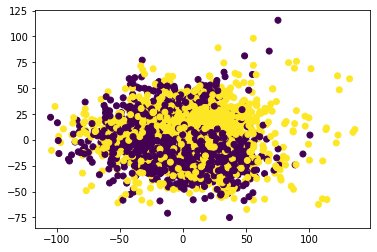

In [65]:
plt.scatter(X_train_reduced[:,0],X_train_reduced[:,1],c=y_train_label)

plt.show()

In [42]:
# using 167 pca components 
X_train,X_test,y_train,y_test=train_test_split(X_train_reduced167,y_train_label,test_size=0.2,random_state=0)

# instantiate the model (using the default parameters)
log_model = LogisticRegression()
C = 1.0  # SVM regularization parameter
#svc = svm.SVC(kernel='linear', C=C)
# LinearSVC (linear kernel)
lin_svc = svm.LinearSVC(C=C)
#SVC with RBF kernel
rbf_svc = svm.SVC(kernel='rbf', C=C)
# SVC with polynomial (degree 3) kernel
poly_svc = svm.SVC(kernel='poly', C=C)
# decision tree
dt = DecisionTreeClassifier(random_state=0)
# random forest 
rf = RandomForestClassifier(random_state=0)
# naive bayes
#nb = GaussianNB()
# perceptron 
#per = Perceptron()
# knn 
#knn=KNeighborsClassifier(n_neighbors=7) # log(1599) is about 7
# bagging classifier
#bc = BaggingClassifier(base_estimator=dt, random_state=0)
# Import AdaBoostClassifier
ada = AdaBoostClassifier(base_estimator=dt, random_state=0)

#models = [log_model, svc, lin_svc, rbf_svc, poly_svc, dt, rf, nb, per, knn, bc, ada]
models = [log_model, lin_svc, rbf_svc, poly_svc, rf, ada]#, nb, per, knn, bc, ada]
#names = ['Logistic Regression', 'SVC(linear kernal)','SVC(RBF)','SVC(polynomial)','Decision Tree',
#        'Random Forest', 'Naive Bayes', 'Perceptron', 'KNN' , 'Bagging Classifier', 'Ada Boosting']
               #'VotingClassifier'
names = ['Logistic Regression', 'SVC(linear kernal)','SVC(RBF)','SVC(polynomial)','Random Forest','Ada Boosting']
reports=[]
f1_score=[]
precision=[]
recall=[]
acc=[]

for model in models: 
    # fit the model
    model.fit(X_train,y_train)
    # predict on the test set 
    y_pred=model.predict(X_test)
    # save the scores for comparison 
    report=metrics.classification_report(y_test, y_pred,output_dict=True)
    reports.append(report)
    f1_score.append(report['weighted avg']['f1-score'])
    precision.append(report['weighted avg']['precision'])
    recall.append(report['weighted avg']['recall'])
    acc.append(metrics.accuracy_score(y_test,y_pred))
    
models_df=pd.DataFrame({'models':names, 'accuracy':acc,'f1_score':f1_score,'precision':precision, 'recall':recall})
models_df.round(3).sort_values(by='accuracy', ascending=False)

C:\Users\effyf\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\effyf\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\effyf\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\effyf\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unsc

,models,accuracy,f1_score,precision,recall
1,SVC(linear kernal),0.799,0.800,0.801,0.799
3,SVC(polynomial),0.797,0.797,0.797,0.797
0,Logistic Regression,0.788,0.788,0.789,0.788
4,Random Forest,0.746,0.746,0.746,0.746
5,Ada Boosting,0.746,0.747,0.748,0.746
2,SVC(RBF),0.652,0.591,0.746,0.652


using 167 PCA components does not increase the accuracy much. 

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=90,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   brightness_range=[0.8, 1.1])
                                   #fill_mode='nearest')

data_generator = ImageDataGenerator(rotation_range=90, #try 45
                                    width_shift_range=0.15,
                                    height_shift_range=0.15,
                                    horizontal_flip=True,
                                    vertical_flip=True,
                                    brightness_range=[0.8, 1.1],
                                    fill_mode='nearest')

new_samples, new_labels = next(data_generator.flow(X_train, y_train, batch_size=len(X_train)))
#xtra = np.concatenate([xtra, new_samples])
#ytra = np.concatenate([ytra, new_labels])


#test_datagen = ImageDataGenerator(rescale=1./255)


#train_generator = train_datagen.flow_from_directory(
#        'Data/train',
#        target_size=(224, 224),# this is the target directory
#        class_mode='binary') 
#test_generator = test_datagen.flow_from_directory(
#        'Data/test',  # this is the target directory
#        class_mode='binary') 


#model.save_weights('first_try.h5') # always save your weights after training or during training

#for inputs,outputs in train_generator:
#    pass

In [42]:
print(new_samples.shape)
print(X_train.shape)

(2637, 224, 224, 3)
(2637, 224, 224, 3)


In [45]:
X_new_train = np.concatenate([X_train, new_samples])
y_new_train = np.concatenate([y_train, new_labels])

del new_samples, new_labels
print('New number of training samples:', len(X_new_train))

New number of training samples: 5274


In [46]:
# saving the generated data 
np.save('X_new_train.npy', X_new_train)
np.save('y_new_train.npy', y_new_train)

In [9]:
# load the new data
X_new_train=np.load('X_new_train.npy')
y_new_train=np.load('y_new_train.npy')

In [10]:
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import Adam, RMSprop

Using TensorFlow backend.


In [11]:
from keras.utils.np_utils import to_categorical # used for converting labels to one-hot-encoding
y_train2 = to_categorical(y_train, num_classes= 2)
y_new_train2=to_categorical(y_new_train, num_classes= 2)

In [52]:
def initiate():
    model = Sequential()
    model.add(Conv2D(64, kernel_size=(3, 3),padding = 'Same',input_shape=(224,224,3), activation= 'tanh'))
              #, kernel_initializer='glorot_uniform'))#'random_uniform'))
    #decrease the unit by half in each layer 
    # try other activation functions (relu initially)
    # try other opt rmsprop 
    model.add(MaxPool2D(pool_size = (2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(64, kernel_size=(3, 3),padding = 'Same',
                      activation= 'tanh'))#, kernel_initializer='glorot_uniform'))#'random_uniform'))
    model.add(MaxPool2D(pool_size = (2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='tanh',kernel_initializer='normal'))
    model.add(Dense(2, activation='softmax'))
   # model.summary()
    model.compile(optimizer = Adam(lr = 1e-5) ,loss = "binary_crossentropy", metrics=["accuracy"])
    return model

In [53]:
model=initiate()
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 112, 112, 64)      0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 112, 112, 64)      36928     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 56, 56, 64)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 56, 56, 64)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 200704)          

In [54]:
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("best_model.hdf5", monitor='val_accuracy', verbose=1,
    save_best_only=True, mode='auto', period=1)

history = model.fit(X_new_train, y_new_train2, 
                     validation_split=0.2,
                     epochs= 30, 
                     batch_size= 64,
                     callbacks=[checkpoint])

Train on 4219 samples, validate on 1055 samples
Epoch 1/30
4219/4219 [==============================] - 368s 87ms/step - loss: 0.8464 - accuracy: 0.5542 - val_loss: 0.5791 - val_accuracy: 0.6995

Epoch 00001: val_accuracy improved from -inf to 0.69953, saving model to best_model.hdf5
Epoch 2/30
4219/4219 [==============================] - 269s 64ms/step - loss: 0.7022 - accuracy: 0.6148 - val_loss: 0.5629 - val_accuracy: 0.7024

Epoch 00002: val_accuracy improved from 0.69953 to 0.70237, saving model to best_model.hdf5
Epoch 3/30
4219/4219 [==============================] - 260s 62ms/step - loss: 0.6235 - accuracy: 0.6784 - val_loss: 0.4858 - val_accuracy: 0.7507

Epoch 00003: val_accuracy improved from 0.70237 to 0.75071, saving model to best_model.hdf5
Epoch 4/30
4219/4219 [==============================] - 259s 61ms/step - loss: 0.5945 - accuracy: 0.6840 - val_loss: 0.4614 - val_accuracy: 0.7564

Epoch 00004: val_accuracy improved from 0.75071 to 0.75640, saving model to best_model.

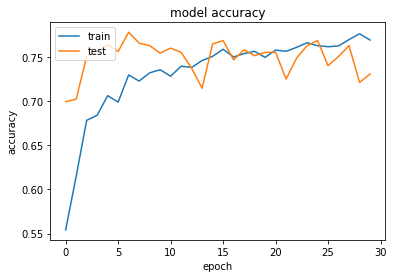

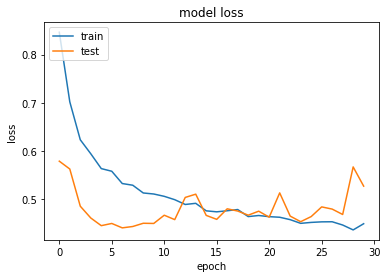

In [57]:
# visualize the accuracy overtime 
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# visualize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [55]:
# Set a learning rate annealer
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=5, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=1e-7)

In [59]:
checkpoint = ModelCheckpoint("best_model2.hdf5", monitor='val_loss', verbose=1,
    save_best_only=True, mode='auto', period=1)
model2=initiate()
history2 = model2.fit(X_new_train, y_new_train2, 
                     validation_split=0.2,
                     epochs= 30, 
                     batch_size= 64,
                     callbacks=[checkpoint,learning_rate_reduction])

Train on 4219 samples, validate on 1055 samples
Epoch 1/30
4219/4219 [==============================] - 240s 57ms/step - loss: 0.8246 - accuracy: 0.5485 - val_loss: 0.7405 - val_accuracy: 0.5602

Epoch 00001: val_loss improved from inf to 0.74052, saving model to best_model2.hdf5
Epoch 2/30
4219/4219 [==============================] - 257s 61ms/step - loss: 0.7579 - accuracy: 0.5644 - val_loss: 0.6690 - val_accuracy: 0.5981

Epoch 00002: val_loss improved from 0.74052 to 0.66896, saving model to best_model2.hdf5
Epoch 3/30
4219/4219 [==============================] - 242s 57ms/step - loss: 0.7117 - accuracy: 0.5814 - val_loss: 0.7531 - val_accuracy: 0.5611

Epoch 00003: val_loss did not improve from 0.66896
Epoch 4/30
4219/4219 [==============================] - 248s 59ms/step - loss: 0.6929 - accuracy: 0.5892 - val_loss: 0.7314 - val_accuracy: 0.5573

Epoch 00004: val_loss did not improve from 0.66896
Epoch 5/30
4219/4219 [==============================] - 252s 60ms/step - loss: 0.678

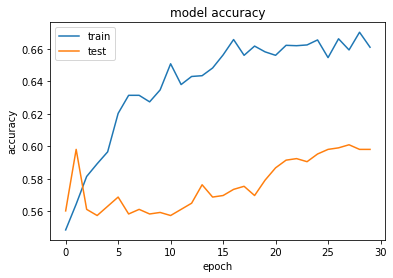

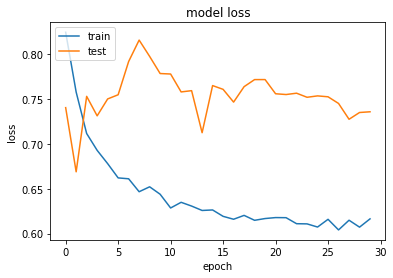

In [60]:
# visualize the accuracy overtime 
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# visualize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### predict on the holdout set

In [72]:
from keras.models import load_model
model = load_model('best_model.hdf5')
# predict on the holdout set
results2=pd.DataFrame(model.predict(X_holdout))
# convert to 0/1
results=(results2[1]>0.5)*1
# calculate the acc on the holdout set
holdout_acc=(sum(results==y_holdout))/len(y_holdout)
holdout_acc

0.7636363636363637

In [23]:
import os, glob
import numpy as np
from keras.models import model_from_yaml
from keras.preprocessing import image

folder_benign_test = 'Data/test/benign'
folder_malignant_test = 'Data/test/malignant'

def predict(model,weights,path):

# load model from disk
    yaml_file = open(model, 'r')
    loaded_model_yaml = yaml_file.read()
    yaml_file.close()
    model = model_from_yaml(loaded_model_yaml)
    # load weights into new model
    model.load_weights(weights)
    #print("Loaded model from disk")

    # test data path
    img_dir = path#folder_benign_test#"dataset_test" # Enter Directory of all images

    # iterate over each test image
    # make a prediction and add to results 
    data_path = os.path.join(img_dir, '*g')
    files = glob.glob(data_path)
    data = []
    results = []
    for f1 in files:
        img = image.load_img(f1, target_size = (256, 256))
        img = image.img_to_array(img)
        img = np.expand_dims(img, axis = 0)
        data.append(img)
        result = model.predict(img)
        r = np.argmax(result, axis=1)
        results.append(r)
    return results

In [16]:
#import pandas as pd
# predict 
result=pd.DataFrame(predict('model_2.yaml','model_2.h5',folder_benign_test))

In [22]:
(result==0).sum()

0    360
dtype: int64

In [24]:
result1=pd.DataFrame(predict('model_2.yaml','model_2.h5',folder_malignant_test))

In [27]:
(result1==0).sum()

0    300
dtype: int64